In [1]:
import pandas as pd
import joblib
import lightgbm as lgb

In [2]:
model = joblib.load('models_DART_slope/fold_0_iter_4117_score_0.80009.pkl')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

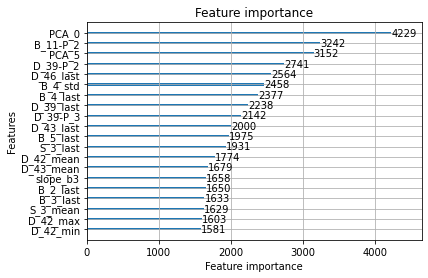

In [7]:
lgb.plot_importance(model, importance_type='split' , max_num_features=20)